# Graph gerenation

Here i d like to write an algorithm of generating a random graph

Граф Эрдёша–Реньи характеризуется двумя параметрами: n – ​число узлов, а p – ​вероятность того,
что между любыми двумя узлами есть ребро.

В графе Эрдёша–Реньи вероятность того, что граф является связным, очень мала, когда p мала,
и почти равна 1, когда p велика. Между этими двумя режимами происходит быстрый переход при
конкретном значении p, обозначаемом $p^{*}$.
Эрдёш и Реньи показали, что это критическое значение равно $p^{*}$ = (ln n) / n, где n – ​количество узлов.
Случайный граф G(n, p) вряд ли будет связным, если p < $p^{*}$, и очень вероятно обратное, если p > $p^{*}$.

## Полный граф
Функция что создает полный граф, с количеством вершин - n

In [3]:
import networkx as nx

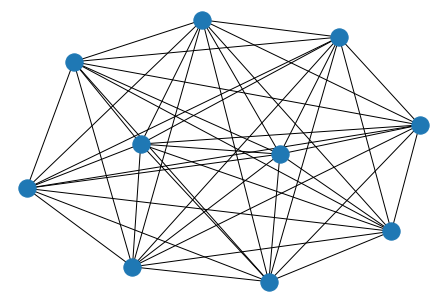

In [4]:
def all_pairs(nodes):
    for index1, node1 in enumerate(nodes):
        for index2, node2 in enumerate(nodes):
            if index1 < index2:
                yield node1, node2
                
                
def build_complete_graph(n, nodes=None):
    g = nx.Graph()
    
    if not nodes:
        nodes = range(n)
    elif len(nodes) != n:
        raise ValueError('Number of nodes must be equal to the len of nodes list')
        
    g.add_nodes_from(nodes)
    g.add_edges_from(all_pairs(nodes))
    
    return g


g = build_complete_graph(10)
nx.draw(g)

## Граф Эрдёша–Реньи
G(n, p) содержит n узлов, а каждая пара узлов соединена ребром с вероятно-
стью p.

In [5]:
import networkx as nx
import numpy as np

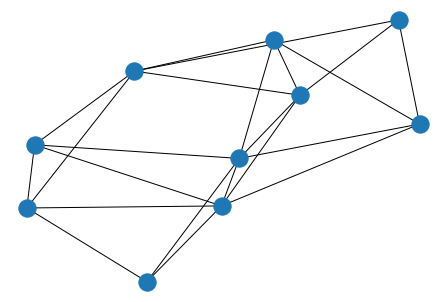

In [21]:
def flip(p):
    return np.random.random() < p

def random_pairs(nodes, p):
    for edge in all_pairs(nodes):
        if flip(p):
            yield edge
            

def make_random_graph(nodes, p):
    g = nx.Graph()
    g.add_nodes_from(nodes)
    g.add_edges_from(random_pairs(nodes, p))
    
    return g

g = make_random_graph(range(10), 0.5)
nx.draw(g)

## Вероятность связоности

Возьму функцию проверки связоности с соответствующего модуля 

In [22]:
def reachable_nodes(G, start):
    seen = set()
    stack = [start]
    
    while stack:
        node = stack.pop()
        if node not in seen:
            seen.add(node)
            stack.extend(G.neighbors(node))
            
    return seen


def is_connected(G):
    start = next(iter(G))
    connected_nodes = reachable_nodes(G, start)
    return len(connected_nodes) == len(G)

Теперь попробуем построить распределение

In [39]:
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np

In [36]:
def build_graphs(number_of_graphs):
    return {
        probability: sum([is_connected(make_random_graph(range(100), probability))
                          for _ in range(number_of_graphs)])
                     for probability in np.arange(0, 1, 0.01)                               
        }

results = build_graphs(1000)
probabilities = results.keys()
connected_n = results.values()

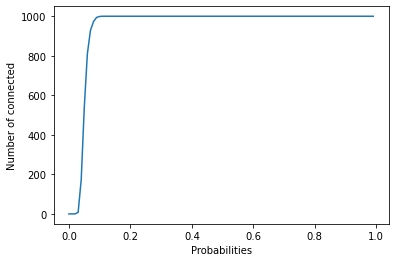

In [43]:
plt.plot(probabilities, connected_n)
plt.xlabel('Probabilities')
plt.ylabel('Number of connected')

plt.show()

## Альтернативное задание случайного графа

Альтернативное определение, обозначаемое G(n, m), также характеризуется двумя параметрами: ко-
личеством узлов, n, и количеством ребер, m. Согласно этому определению, количество ребер являет-
ся фиксированным, но их расположение случайно.

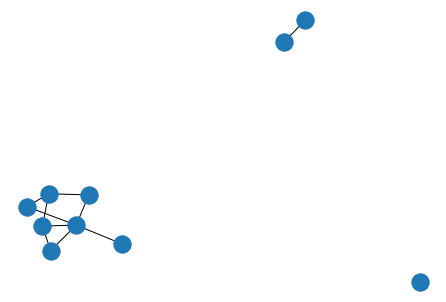

In [59]:
from random import sample 

def make_m_random_pairs(nodes, m):
    pairs = all_pairs(nodes)
    rand_pairs = sample(list(pairs), m)
    
    return list(rand_pairs)

def make_rand_graph_with_m_edges(nodes, m):
    g = nx.Graph()
    g.add_nodes_from(nodes)
    g.add_edges_from(make_m_random_pairs(nodes, m))
    
    return g


g = make_rand_graph_with_m_edges(range(10), 10)
nx.draw(g)